In [1]:
import numpy as np

In [4]:
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
def read_mprofile_file_multiprocess(filename):
    mem_usage = []
    sample = []
    
    f = open(filename,'r')
    
    for i,l in enumerate(f):
        if l == '\n':
            raise ValueError('Sampling time was too short')
        field, value = l.split(' ', 1)
        values = value.split(' ')
              
        if field=="MEM":
            # append the existing sample and reset to zero
            mem_usage.append(sample)
            sample = []
            sample.append((float(values[0]), float(values[1])))
        elif field=="CHLD": 
            sample.append((int(values[0]), float(values[1])))
          
    f.close()
    return mem_usage[1:]

def convert_to_array(filename, is_pickle=False): 
    import pandas as pd
    
    if is_pickle:
        from cPickle import load
        with open(filename) as f: 
            mem_usage = load(f)
    
    else:
        mem_usage = read_mprofile_file_multiprocess(filename)
        mem_usage = filter(lambda m: len(m) > 1, mem_usage)
    
    times =[m[0][1] for m in  mem_usage]
    pids = np.sort(np.unique([m[0] for n in mem_usage for m in n[1:] if not isinstance(m,float)]))
    
    time_lookup = {time: i for i,time in enumerate(times)}
    pid_lookup = {pid:i for i,pid in enumerate(pids)}
    
    data = np.zeros((len(times), len(pids)))
    
    for i,m in enumerate(mem_usage):
        t = m[0][1]
        try: 
            for pid,mem in m[1:]:
                data[time_lookup[t]][pid_lookup[pid]] = mem
        except TypeError:
            print 'found a bad value in ', i
    return pd.DataFrame(data, index=times, columns=pids)

def plot_mem_usage(filename, is_pickle=False):
    data_df = convert_to_array(filename, is_pickle)
    
    f = plt.figure(figsize=(10,6))
    data_df.plot(legend=False, figsize=(14,10), grid=True, fontsize=14)
    data_df.sum(axis=1).plot(style='--', grid=True)
    plt.xlabel('timestamp'); plt.ylabel('memory usage in MB')

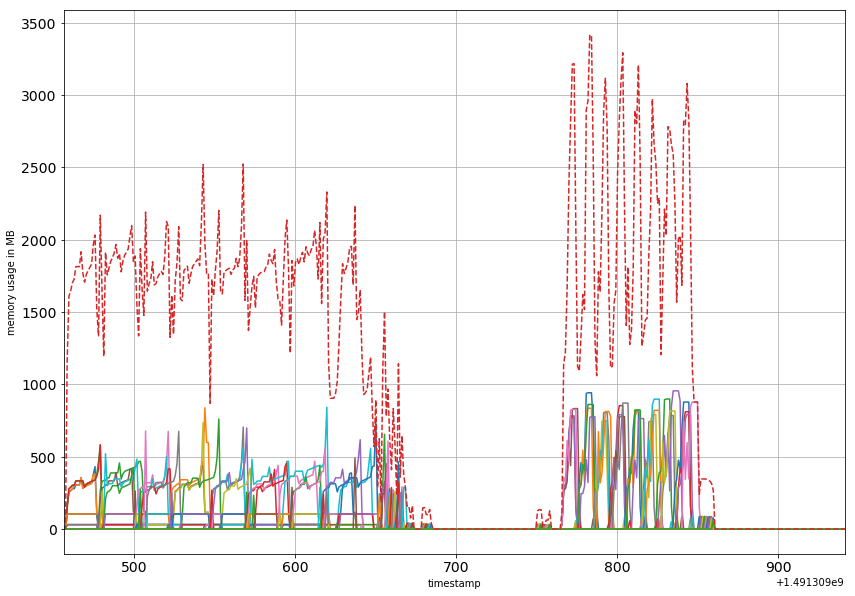

In [5]:
plot_mem_usage('/home/ics/roskar/mem-no-worker-reuse.dump', True)

found a bad value in  335


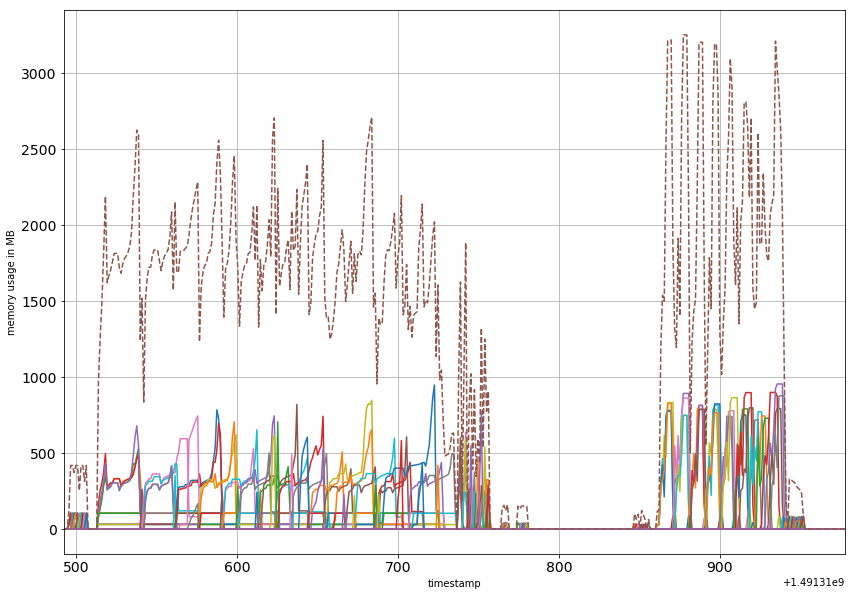

In [61]:
plot_mem_usage('/home/ics/roskar/mem-no-worker-reuse2.dump', True)

found a bad value in  39
found a bad value in  319


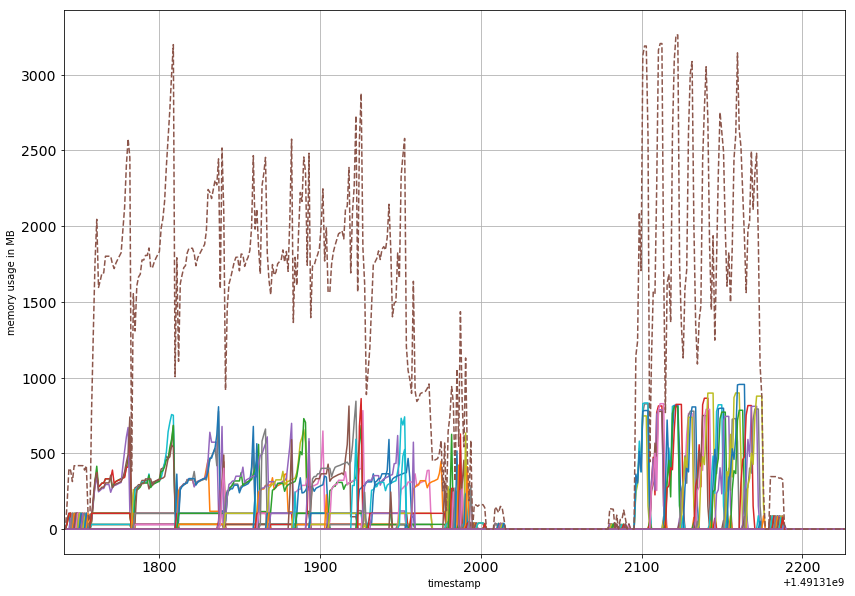

In [65]:
plot_mem_usage('/home/ics/roskar/mem-no-worker-reuse3.dump', True)

found a bad value in  135
found a bad value in  324


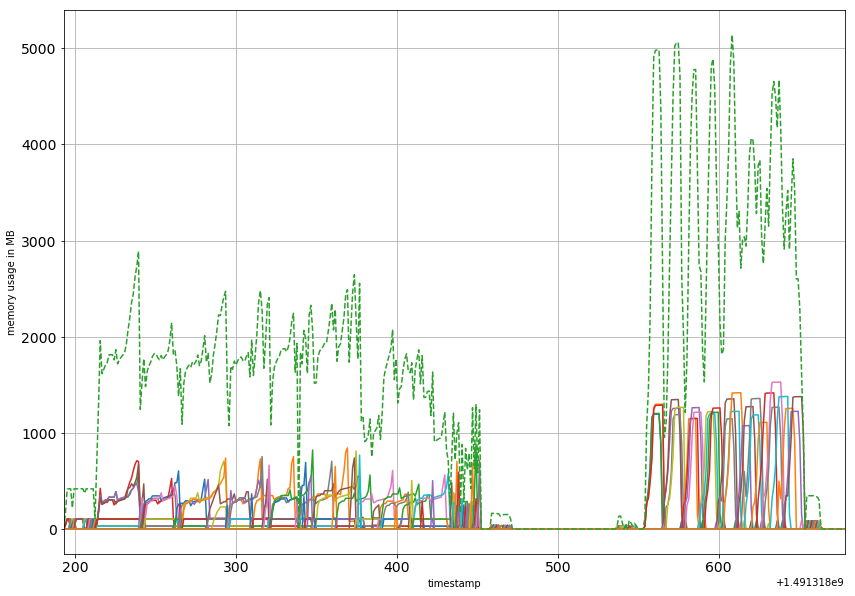

In [66]:
plot_mem_usage('/home/ics/roskar/mem-no-worker-reuse-list.dump', True)

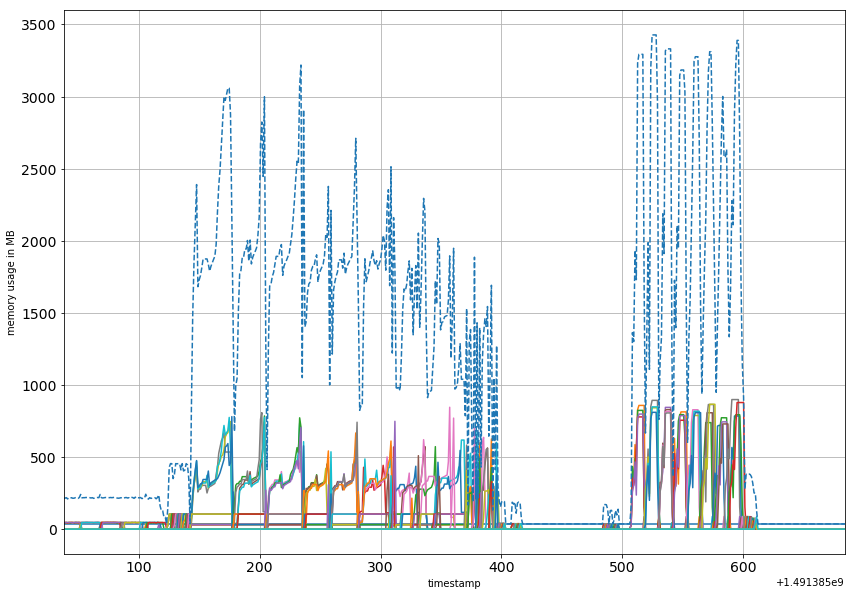

In [67]:
plot_mem_usage('/home/ics/roskar/mem-no-worker-reuse-no-part-array.dump', True)

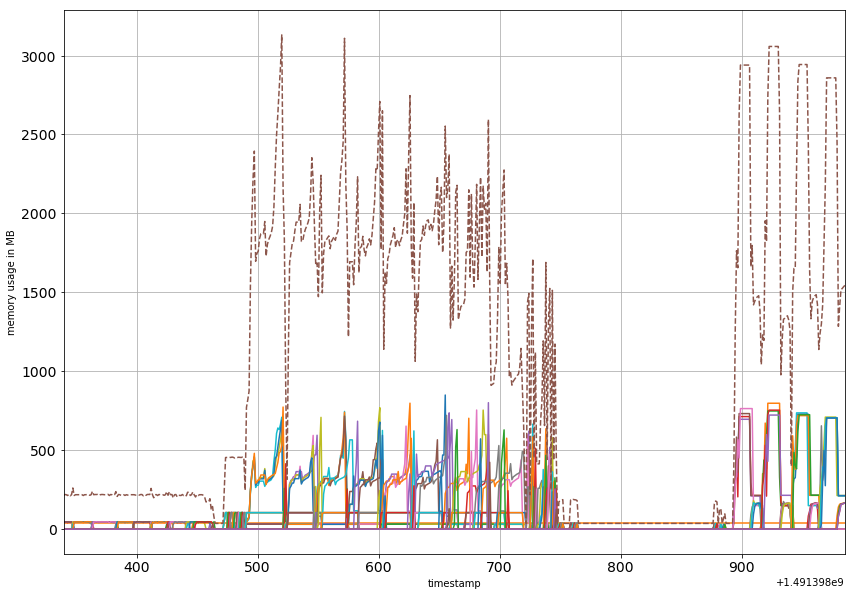

In [69]:
# using map instead of mapPartitions for fof_rdd
plot_mem_usage('/home/ics/roskar/mprofile_20170405151859.dat')

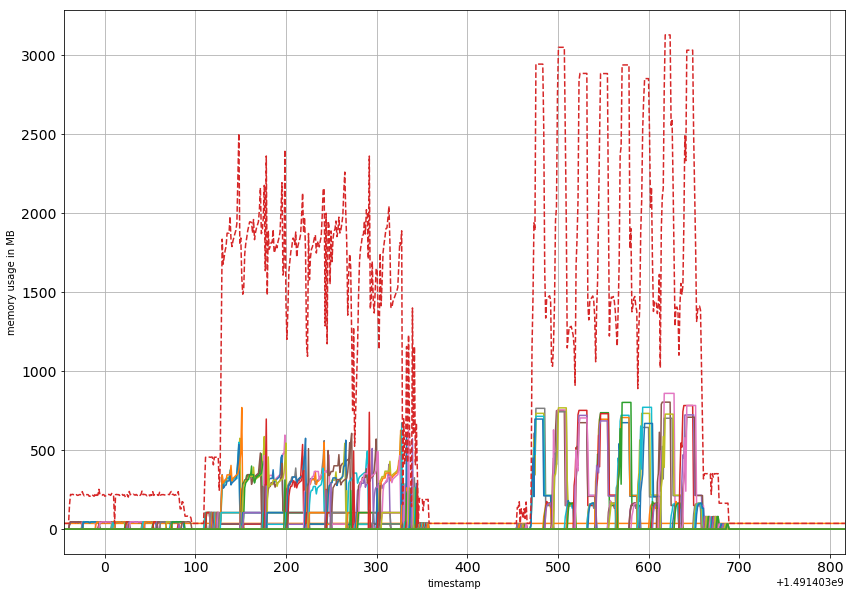

In [77]:
# same as above -- sanity check
plot_mem_usage('/home/ics/roskar/mprofile_20170405163554.dat')

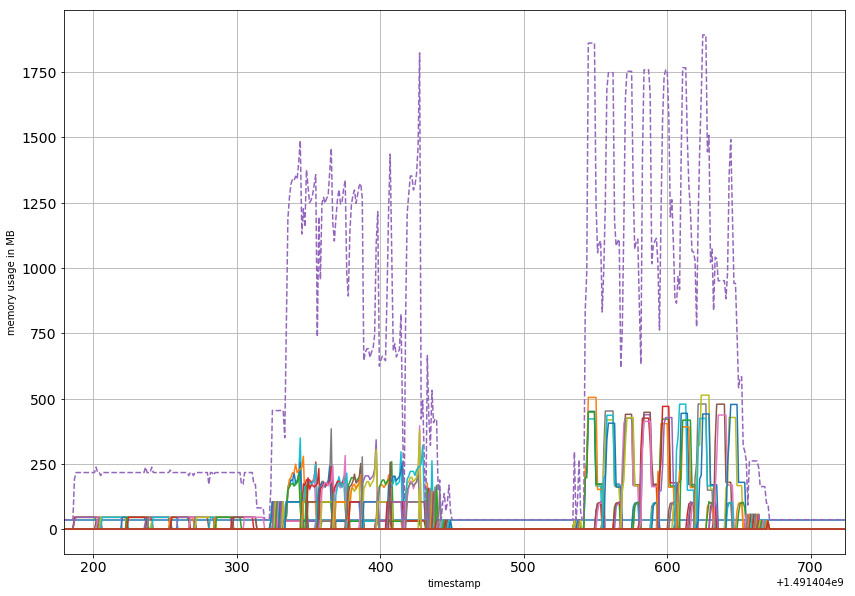

In [85]:
# 50% fewer particles
plot_mem_usage('/home/ics/roskar/mprofile_20170405165619.dat')

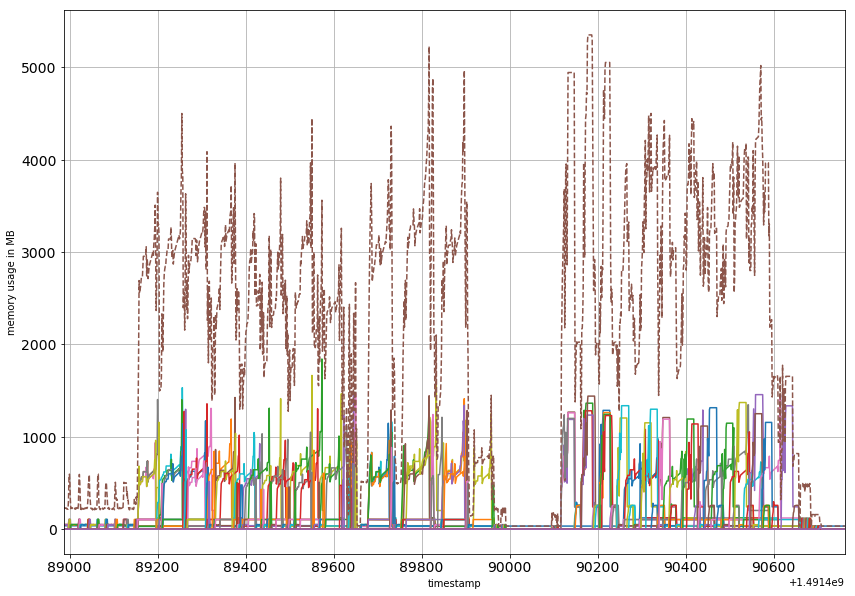

In [22]:
# 2x number of particles
plot_mem_usage('/home/ics/roskar/mprofile_20170406162946.dat')

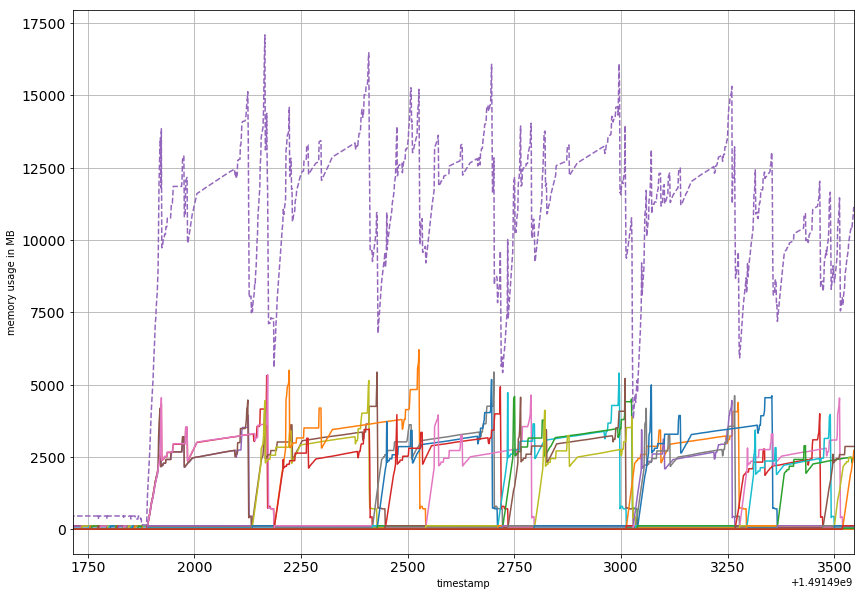

In [9]:
# all particles
plot_mem_usage('/home/ics/roskar/mprofile_20170406171514.dat')